# P2 Computational Vision

**Important:** Read the file `README.md` before start coding.


<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">

**Delivery**
<ol>

Requirements to fulfill:
<ul>
    <li>  Answer the questions introduced in the exercises.    
    <li>  The implemented code should be,<br>
        - free of errors (Run All before delivery and check for possible errors)<br>
        - optimized ( e.g. do not use 'for' instruction when indexing numpy arrays)<br>
        - readable  ( e.g. avoiding the implementation of more than 2 loops within a line)<br>
        - commented and with descriptions        
    <li> The deliverable must be a file named P2_Student1_Student2.zip that includes:
    <ul>
        <li> The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
         <li> All the images used in this notebook.
    </ul>

</ul>

 **Deadline (Campus Virtual): October 14th, 23:00 h** 


</ol>
</div>


## Practicum 2: Filtering and edge detection



The main topics are:
1. Image smoothing and convolution
2. Edge detection 

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.


### Image smoothing and convolution

In [94]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.color import rgb2gray
from skimage import exposure
from skimage import transform as tf # useful for image transformations
from skimage import img_as_float

from scipy.ndimage import convolve

In [14]:
%matplotlib inline

### 2.1 Histogram visualization

**Exercise 2.1**: 

a) 
- Read the image "peppers.png" from folder 'images'
- Visualize the histogram of the gray image

    To plot the histogram follow the following instructions:
    - Convert the image to grayscale with the function `color.rgb2gray()` of the package `skimage`.
    - Use the `exposure` module within the `skimage` library, which makes the histogram extraction easy.
    - Use `bar` of `matplotlib` to visualize the histogram.
    - Obtain the histogram with 8 and 32 bins. 
    - Use the values at the center of the bins to set the ticks labels as the gray value in the range [0-255].
    
    
- What is the histogram representing for an image? 
 

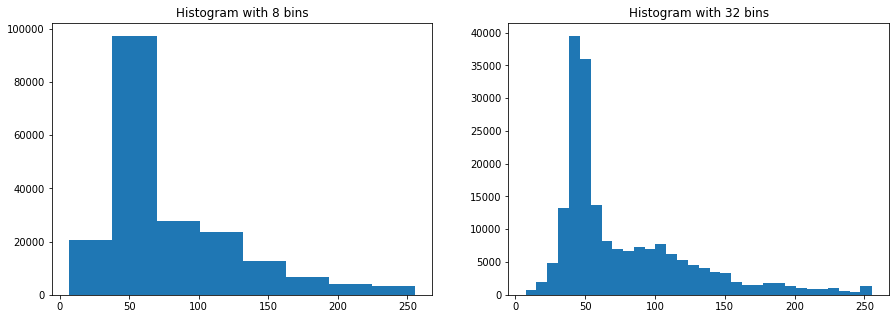

In [89]:
peppers = io.imread('images/peppers.png')
gs_peppers = rgb2gray(peppers)

f, ax = plt.subplots(1, 2, figsize=(15, 5))

hist_8, bins_8 = exposure.histogram(gs_peppers, nbins=8)
ax[0].set_title('Histogram with 8 bins')
ax[0].bar(bins_8 * 255, hist_8, width=256/8)


hist_32, bins_32 = exposure.histogram(gs_peppers, nbins=32)
ax[1].set_title('Histogram with 32 bins')
ax[1].bar(bins_32 * 255, hist_32, width=256/32)

plt.show()

# The histogram represents the occurences 

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)

im_2=img_as_float(im_2)

In [117]:
# b)

# Answer: Values in float images must be within the range [0,1]. The first one loads integers but is read as floats,
# so the image is not loaded properly because the values are still in the [0,255] range.
# The second one is explicitly converted to floats, so the range is transformed to [0,1] and the image is loaded properly.

### 2.2 Grayscale and RGB images filtering (convolutions)

**Exercise 2.2:**
    
a) Read the image `peppers.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the original image (1) with a transposed version of the mask in (2).
4. Convolve the original image (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Visualize the output of each step (1 to 4) in a single figure with short titles on each image to make them understandable.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).



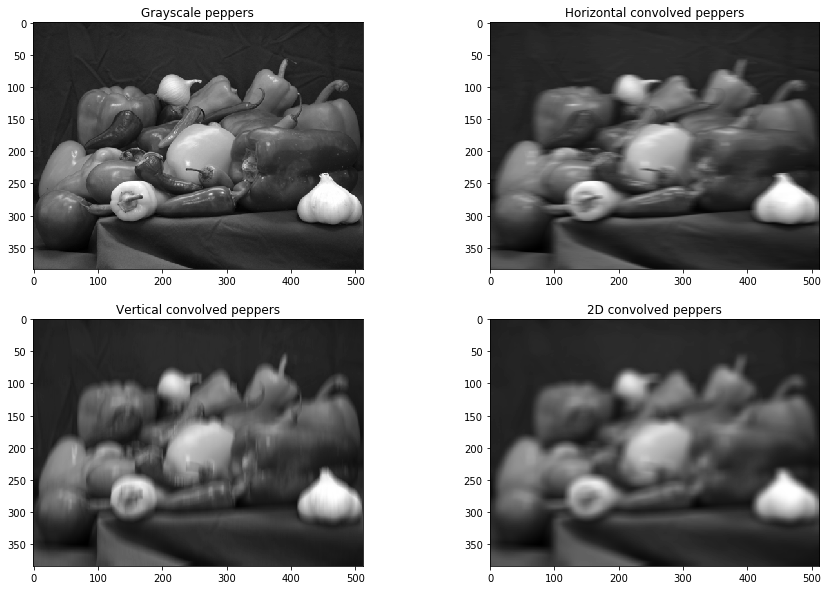

In [91]:
peppers = io.imread('images/peppers.png')
gs_peppers = rgb2gray(peppers)

mask_h1d = np.ones(shape=(1, 15)) / 15
conv_peppers = convolve(gs_peppers, mask_h1d)

mask_v1d = mask_h1d.T
conv_trans_peppers = convolve(gs_peppers, mask_v1d)

mask_m2d = np.ones(shape=(15, 15)) / (15 * 15)
conv_2d_peppers = convolve(gs_peppers, mask_m2d)

f, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0][0].set_title('Grayscale peppers')
ax[0][0].imshow(gs_peppers, cmap='gray')

ax[0][1].set_title('Horizontal convolved peppers')
ax[0][1].imshow(conv_peppers, cmap='gray')

ax[1][0].set_title('Vertical convolved peppers')
ax[1][0].imshow(conv_trans_peppers, cmap='gray')

ax[1][1].set_title('2D convolved peppers')
ax[1][1].imshow(conv_2d_peppers, cmap='gray')

plt.show()

b) In order to convolve an RGB image, each of the channels must be convolved separately.

Show the result obtained when applying a single-channel filter channel by channel separately on `pappers.png` with a 15x15 uniform mask. 

Note: Use the provided method `convolve_RGB_image`.

Note: Use `img_as_float` before the convolutions and for the final image.

In [122]:
# Provided method

# convolve_RGB_image(image to convolve, 
# the mask for the convolution
# image to save the results
def convolve_RGB_image (image, mask, image_convolved):  
    image_convolved[:,:,0]  = ndimage.convolve(img_as_float(image[:,:,0]), mask)
    image_convolved[:,:,1] = ndimage.convolve(img_as_float(image[:,:,1]), mask)
    image_convolved[:,:,2]  = ndimage.convolve(img_as_float(image[:,:,2]), mask)


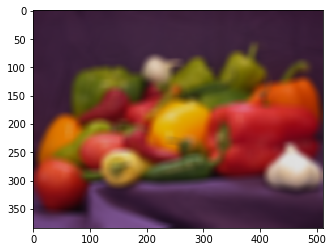

In [124]:
# Your solution here
import scipy.ndimage as ndimage
im_to_convolve = peppers.copy()
image_convolved = im_to_convolve.copy()
mask_m2d = np.ones(shape=(15, 15))
convolve_RGB_image(im_to_convolve, mask_m2d, image_convolved)
plt.imshow(image_convolved)


### 2.3 Effect of image scale on convolutions

**Exercise 2.3.**

a) Resize the image 'peppers.png' and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.

Note: Use the provided method `create_RGB_histogram_figure` to show the RGB histogram.


In [92]:
# Provided method

# create_histogram_figure(image to create the histogram, 
# 'true' to show the gray image bar,
# number of bins for the histogram, 
# title for the figure)
def create_RGB_histogram_figure(image, bins, gray, title):
    
    histogram_red, bins_red = exposure.histogram(img_as_float(image[:,:,0]), nbins=bins) 
    histogram_green, bins_green = exposure.histogram(img_as_float(image[:,:,1]), nbins=bins)
    histogram_blue, bins_blue = exposure.histogram(img_as_float(image[:,:,2]), nbins=bins)

    fig = plt.figure(figsize=(12,3)) 
    index = np.arange(len(bins_red))
    bar_width = 0.2
    opacity = 0.8

    rects1 = plt.bar(index, histogram_red, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Red')

    rects2 = plt.bar(index + bar_width, histogram_green, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Green')

    rects3 = plt.bar(index + bar_width*2, histogram_blue, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Blue')
    
    if (gray == 'True'): # it will show the gray image bar
        histogram_gray, bins_gray = exposure.histogram(rgb2gray(image), nbins=bins)
        rects4 = plt.bar(index + bar_width*3, histogram_gray, bar_width,
                         alpha=opacity,
                         color='y',
                         label='Gray')

    # Other propierties of the histogram
    plt.title(title)
    plt.xticks(index + bar_width, range(len(bins_red)))
    plt.legend()

    plt.tight_layout()
    plt.show()
    


False

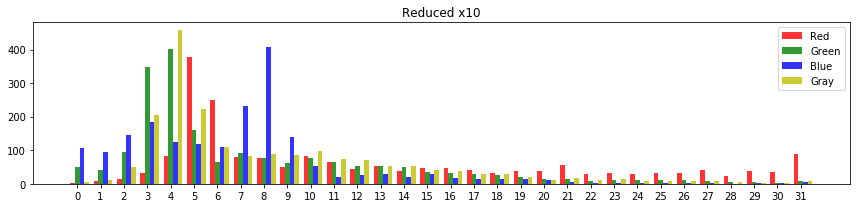

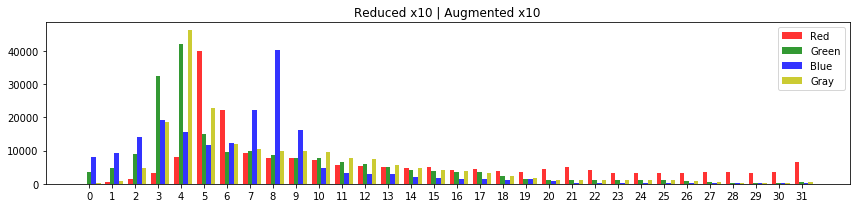

In [106]:
peppers_red_10 = tf.resize(peppers, (peppers.shape[0] // 10, peppers.shape[1] // 10, 3))
peppers_aug_10 = tf.resize(peppers_red_10, (peppers.shape[0], peppers.shape[1], 3))

create_RGB_histogram_figure(peppers_red_10, bins=32, gray='True', title='Reduced x10')
create_RGB_histogram_figure(peppers_aug_10, bins=32, gray='True', title='Reduced x10 | Augmented x10')

**Exercise 2.3.**

b) Apply a convolution (15x15 uniform mask) on the resized images and visually compare the results.

1. Convolve the original image.
2. Convolve the image reduced 10 times.
3. Convolve the image augmented 10 times.

In [121]:
# Your solution here

NameError: name 'convolve_RGB_image' is not defined

### 2.4 Image processing with weighting and non-linear filters

**Exercise 2.4**: 

a) Generate the following kernels and apply them to the `peppers.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Note: Use the [skimage.filters functions](https://scikit-image.org/docs/dev/api/skimage.filters.html) for creating the different filters.

In [11]:
# Your solution here
from skimage import filters
image = peppers.copy()
gaussian_peppers = filters.gaussian(image, sigma=1)
plt.imshow(gaussian_peppers)
plt.figure()
gaussian_peppers2 = filters.gaussian(image, sigma=10)
plt.imshow(gaussian_peppers2)
median_peppers = filters.gaussian(image)
plt.figure()
plt.imshow(median_peppers)

# Comment:
# 1 - The Gaussian filter is a low pass filter, which is convenient for smoothing images (since errors are high-frequency)
# So, the peppers are smoothed.

# 2 - In our case, we have increased sigma. The greater the sigma, the more smoothing.

# 3 - Median filter: The median filter, which is a non-linear filter, does not smooth so much the image.
# Instead, it can be used to remove salt&pepper noise from images, because it takes the median value of the pixel,
# so extreme values are filtered out.

### Edge detection

### 2.5 Determine the optimal contour 

a) Load the 'starbuck.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Q1: Which is the best countour detection technique? 

- Q2: Which are the optimal canny parameters for this image? (use sigma = 1, 3 and 5).


**Note**: Use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

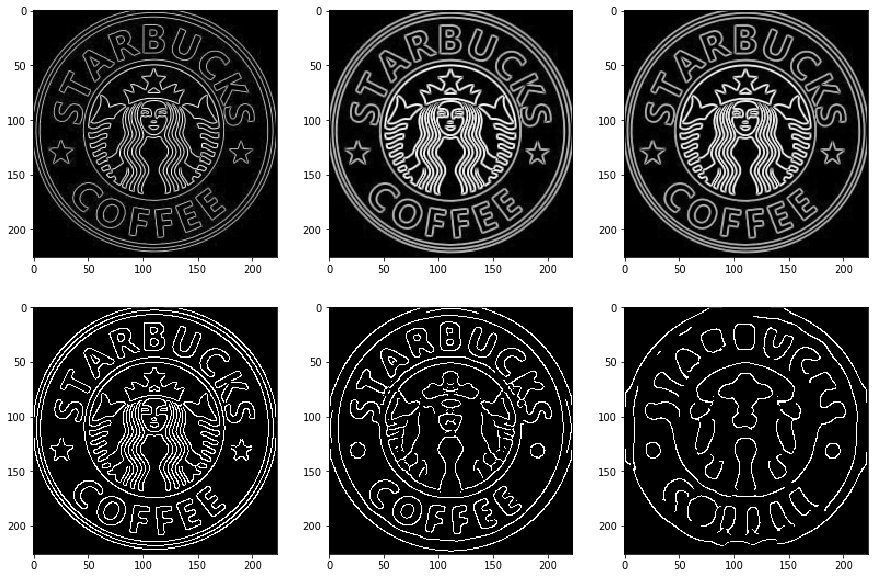

In [130]:
from skimage.filters import roberts, prewitt, sobel
from skimage.feature import canny

starbuck = io.imread('images/starbuck.jpg')
gs_starbuck = rgb2gray(starbuck)

f, ax = plt.subplots(2, 3, figsize=(15, 10))

sb_roberts = roberts(gs_starbuck)
ax[0][0].set_title('Roberts')
ax[0][0].imshow(sb_roberts, cmap='gray')

sb_prewitt = prewitt(gs_starbuck)
ax[0][0].set_title('Roberts')
ax[0][1].imshow(sb_prewitt, cmap='gray')

sb_sobel = sobel(gs_starbuck)
ax[0][0].set_title('Roberts')
ax[0][2].imshow(sb_sobel, cmap='gray')

sb_canny = canny(gs_starbuck, sigma=1)
ax[0][0].set_title('Roberts')
ax[1][0].imshow(sb_canny, cmap='gray')

sb_canny = canny(gs_starbuck, sigma=3)
ax[0][0].set_title('Roberts')
ax[1][1].imshow(sb_canny, cmap='gray')

sb_canny = canny(gs_starbuck, sigma=5)
ax[0][0].set_title('Roberts')
ax[1][2].imshow(sb_canny, cmap='gray')

plt.show()

b)	(Optional): Repeat the experiment with other images, you can use the ones included in the folder `images`. Comment if some parameter needs to be changed for the different images.

#### **Question**

- Which are the limitations of the different images contour extraction?

In [13]:
# Your solution here